## Install the hypso Python package:

https://pypi.org/project/hypso/

## Download HYPSO capture
http://129.241.2.147:8008/virginiabeach/virginiabeach_2024-08-22T14-59-41Z/virginiabeach_2024-08-22T14-59-41Z-l1a.nc

http://129.241.2.147:8008/virginiabeach/virginiabeach_2024-08-22T14-59-41Z/processing-temp/sift-bin.points

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [5]:
import sys
#sys.path.insert(0, '/home/cameron/Projects/hypso-package')
from hypso import Hypso1

## Read NetCDF File

In [3]:
# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Nedlastinger'
l1a_nc_file = os.path.join(dir_path, 'virginiabeach_2024-08-22T14-59-41Z-l1a' + '.nc')
points_file = os.path.join(dir_path, 'sift-bin.points')

# Create Satellite Object
satobj = Hypso1(path=l1a_nc_file, verbose=True)

[INFO] Loading L1a capture virginiabeach_2024-08-22T14-59-41Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] No georeferencing .points file provided. Skipping georeferencing.


In [4]:
satobj.load_points_file(path=points_file, image_mode='standard', origin_mode='qgis')
satobj.generate_georeferencing()

[INFO] Running georeferencing...
[INFO] Using UTM map: WGS 84 / UTM zone 18N EPSG: 32618


## Generate geometry

In [5]:
satobj.generate_geometry()

[INFO] Running geometry computation...
ECI position samples: 428
Quaternion samples: 428
ADCS time range: 1724338140.000000 to 1724339040.000000
Frame time range: 1724338781.218508 to 1724338830.968508
199 sample(s) inside frame time range
Interpolating 598 frames
Spatial dimensions: 598 frames/lines, 1092 pixels/samples
Computing pixel latitude and longitude coordinates...
Interpolating pixel coordinate gaps...
Using geometry-computed latitude and longitude values
Computing local angles (sun and satellite azimuth and zenith angles)...
Image Center (lat,lon): (37.28847	-76.34735)
Image Center elevation angle: 56.75595
Image Center off-nadir angle: 38.87421


## Get L1A datacube

In [6]:
l1a_cube = satobj.get_l1a_cube()

In [7]:
l1a_cube

<xarray.DataArray (y: 598, x: 1092, band: 120)>
array([[[ 379,  654, 1092, ..., 2310, 2364, 2484],
        [ 372,  631, 1095, ..., 2651, 2705, 2821],
        [ 384,  656, 1119, ..., 3007, 3075, 3164],
        ...,
        [ 472,  837, 1423, ..., 6808, 6770, 6632],
        [ 476,  836, 1424, ..., 6829, 6739, 6668],
        [ 491,  845, 1402, ..., 6820, 6745, 6672]],

       [[ 373,  634, 1082, ..., 1941, 2052, 2167],
        [ 379,  618, 1100, ..., 2257, 2350, 2481],
        [ 384,  656, 1148, ..., 2641, 2709, 2785],
        ...,
        [ 476,  814, 1403, ..., 6689, 6605, 6476],
        [ 478,  823, 1416, ..., 6697, 6554, 6541],
        [ 463,  816, 1387, ..., 6678, 6633, 6484]],

       [[ 371,  617, 1095, ..., 1812, 1938, 2064],
        [ 379,  646, 1119, ..., 2175, 2274, 2369],
        [ 381,  648, 1119, ..., 2534, 2595, 2740],
        ...,
...
        ...,
        [ 606, 1041, 1821, ..., 2781, 2905, 3051],
        [ 600, 1053, 1820, ..., 2770, 2882, 3025],
        [ 573, 1043, 1854, ..., 2811, 2907, 3036]],

       [[ 395,  670, 1152, ..., 7677, 7494, 7476],
        [ 415,  680, 1181, ..., 7626, 7529, 7589],
        [ 420,  682, 1177, ..., 7636, 7491, 7537],
        ...,
        [ 591, 1085, 1877, ..., 2847, 2981, 3123],
        [ 608, 1079, 1875, ..., 2854, 3017, 3096],
        [ 615, 1091, 1884, ..., 2835, 2947, 3087]],

       [[ 405,  683, 1155, ..., 7922, 7800, 7758],
        [ 410,  665, 1171, ..., 7951, 7818, 7801],
        [ 406,  679, 1195, ..., 7812, 7680, 7663],
        ...,
        [ 624, 1134, 1908, ..., 2884, 2984, 3093],
        [ 625, 1097, 1949, ..., 2838, 3008, 3090],
        [ 621, 1129, 1908, ..., 2878, 2983, 3078]]], dtype=uint16)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 589 590 591 592 593 594 595 596 597
  * x        (x) int64 1091 1090 1089 1088 1087 1086 1085 1084 ... 6 5 4 3 2 1 0
  * band     (band) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

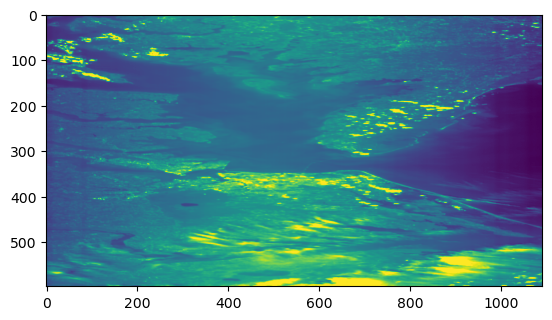

In [8]:
plt.imshow(l1a_cube[:,:,40])

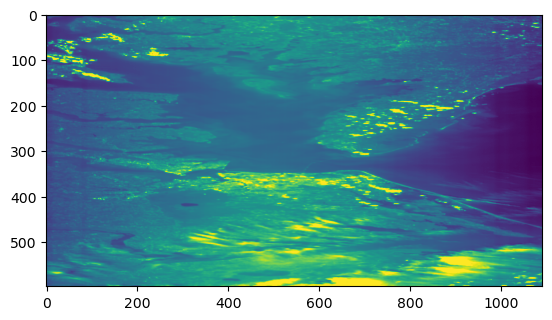

In [9]:
plt.imshow(satobj.l1a_cube[:,:,40])

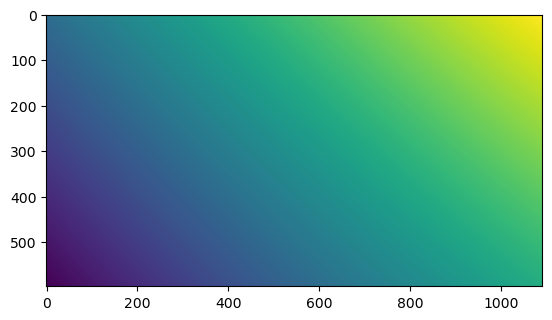

In [10]:
plt.imshow(satobj.longitudes)

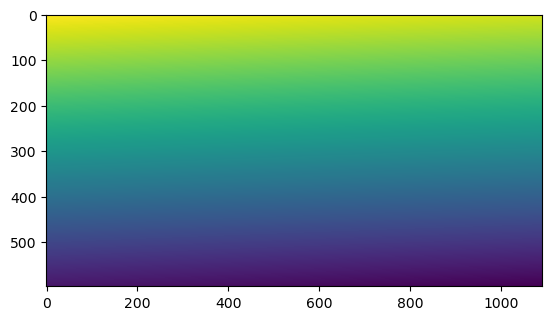

In [11]:
plt.imshow(satobj.latitudes)

## Generate L1B datacube

In [12]:
satobj.generate_l1b_cube()

l1b_cube = satobj.get_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


In [13]:
l1b_cube

<xarray.DataArray (y: 598, x: 1092, band: 120)>
array([[[  0.        ,   0.        ,   0.        , ...,  38.84270967,
          41.0905293 ,  44.25391317],
        [  0.        ,   0.        ,   0.        , ...,  44.87669385,
          46.88143954,  51.00548569],
        [  0.        ,   0.        ,   0.        , ...,  50.86999265,
          54.13645648,  57.21003384],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 105.04490916,
         106.86618893, 103.84296052],
        [  0.        ,   0.        ,   0.        , ..., 106.54057744,
         106.43426739, 110.47788629],
        [  0.        ,   0.        ,   0.        , ..., 105.69703922,
         108.54779852, 114.21221995]],

       [[  0.        ,   0.        ,   0.        , ...,  32.59674133,
          35.72838226,  38.03903838],
        [  0.        ,   0.        ,   0.        , ...,  38.18381611,
          40.71952271,  44.71316229],
        [  0.        ,   0.        ,   0.        , ...,  44.57820559,
          47.54227007,  50.17353417],
...
        [  0.        ,   0.        ,   0.        , ...,  45.10116301,
          49.04870075,  51.57320176],
        [  0.        ,   0.        ,   0.        , ...,  46.36802219,
          48.77570985,  47.91230004],
        [  0.        ,   0.        ,   0.        , ...,  44.90432461,
          49.07224736,  52.939018  ]],

       [[  0.        ,   0.        ,   0.        , ..., 135.07248175,
         137.22722067, 138.58270649],
        [  0.        ,   0.        ,   0.        , ..., 136.22173438,
         136.6007166 , 142.1367683 ],
        [  0.        ,   0.        ,   0.        , ..., 132.99255709,
         136.06223821, 139.79609458],
        ...,
        [  0.        ,   0.        ,   0.        , ...,  45.34760736,
          48.5071608 ,  53.07992233],
        [  0.        ,   0.        ,   0.        , ...,  46.18499214,
          48.70628241,  47.35820858],
        [  0.        ,   0.        ,   0.        , ...,  45.5623185 ,
          49.11774551,  52.00796861]]])
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 589 590 591 592 593 594 595 596 597
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 1085 1086 1087 1088 1089 1090 1091
  * band     (band) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Attributes:
    level:        L1b
    units:        $mW\cdot  (m^{-2}  \cdot sr^{-1} nm^{-1})$
    description:  Radiance (L)

## Write L1b NetCDF

In [14]:
satobj.write_l1b_nc_file()

[INFO] L1b NetCDF file has already been generated. Skipping.


## Create land and cloud mask

In [15]:
# Land mask
satobj.generate_land_mask(land_mask_name="global")
#satobj.generate_land_mask(land_mask_name="ndwi")
#satobj.generate_land_mask(land_mask_name="threshold")
land_mask = satobj.get_land_mask()

# Cloud mask
#satobj.generate_cloud_mask(cloud_mask_name='quantile_threshold', quantile=0.5)
cloud_mask = satobj.get_cloud_mask()

# Unified mask
unified_mask = satobj.get_unified_mask()

[INFO] Running global land mask generation...


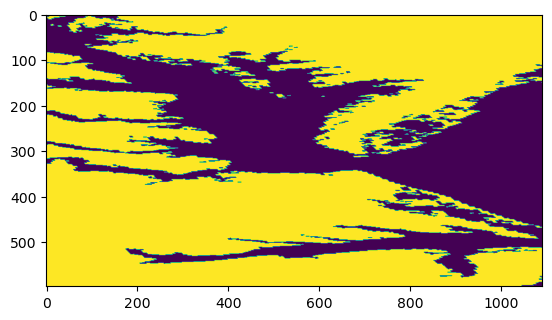

In [16]:
plt.imshow(unified_mask)

## Generate atmospheric corrected L2A datacube

In [17]:
# 6SV1
satobj.generate_l2a_cube(product_name='6sv1')

# ACOLITE
#satobj.set_acolite_path(path='/home/cameron/Projects/acolite/')
#satobj.generate_l2a_cube(product_name='acolite')

l2a_cube = satobj.get_l2a_cube()

satobj.write_l2a_nc_file()

[INFO] Running 6SV1 atmospheric correction

-------  Py6S Atmospheric Correction  ----------
ROI:
Max Lat: 38.89471781906347  Min Lat: 35.52002969100794
Max Lon: -75.21735995250224  Min Lon: -77.00632972163866


100%|██████████| 120/120 [00:52<00:00,  2.27it/s]


[INFO] L1b NetCDF file has already been generated. Skipping.


## Get TOA Reflectance from TOA Radiance

In [18]:
satobj.generate_toa_reflectance()

toa_rrs_cube = satobj.get_toa_reflectance()

## Get Spectrum

In [19]:
lat = satobj.latitudes[200,500]
lon = satobj.longitudes[200,500]

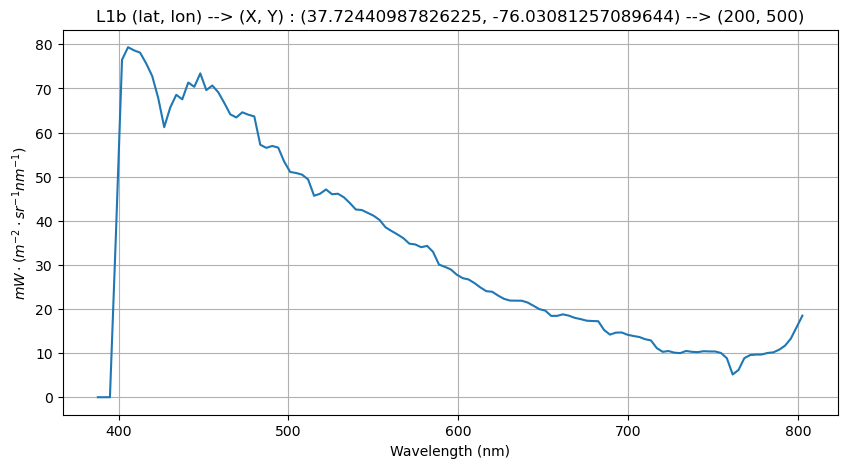

In [20]:
#l1a_spectrum = satobj.get_l1a_spectrum(latitude=lat, longitude=lon)
#satobj.plot_l1a_spectrum(latitude=lat, longitude=lon)

l1b_spectrum = satobj.get_l1b_spectrum(latitude=lat, longitude=lon)
satobj.plot_l1b_spectrum(latitude=lat, longitude=lon)

#l2a_spectrum = satobj.get_l2a_spectrum(latitude=lat, longitude=lon)
#satobj.plot_l2a_spectrum(latitude=lat, longitude=lon)


## Get Band Ratio Chlorophyll Estimates (band ratio)

In [21]:
satobj.generate_chlorophyll_estimates(product_name="band_ratio")
chl = satobj.get_chlorophyll_estimates(product_name="band_ratio")

[INFO] Running band ratio chlorophyll estimation...


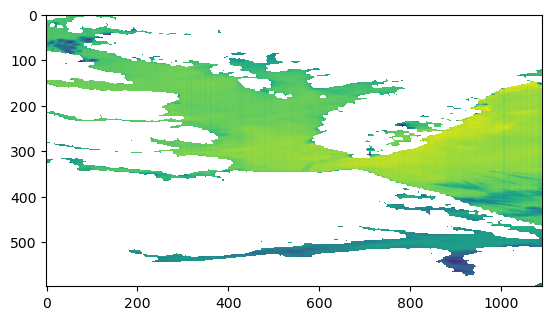

In [22]:
plt.imshow(chl)

## Get Band Ratio Chlorophyll Estimates (6SV1 AQUA Tuned)

In [23]:
model = "/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib"
satobj.generate_chlorophyll_estimates(product_name="6sv1_aqua", model=model)
chl = satobj.get_chlorophyll_estimates(product_name="6sv1_aqua")

[INFO] Running 6SV1 AQUA Tuned chlorophyll estimation...


/home/cameron/miniforge3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


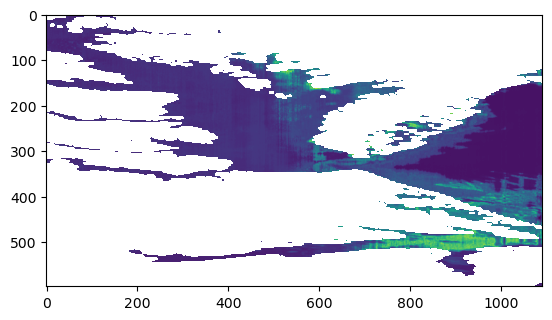

In [25]:
plt.imshow(chl)

## Resampling

In [24]:
satobj.resample_l1a_cube()
satobj.resample_l1b_cube()
satobj.resample_l2a_cube()
satobj.resample_chlorophyll_estimates()
satobj.resample_products()

TypeError: Hypso1.resample_l1a_cube() missing 1 required positional argument: 'area_def'

## Future

In [ ]:
satobj.write_chlorophyll_estimates()
satobj.load_chlorophyll_estimates()

satobj.write_products()
satobj.load_products()